In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter
import uproot
sys.path.append("../")
import saq


Welcome to JupyROOT 6.28/06


In [5]:
# Define the list of file paths
root_file_paths = [
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_08_04.root', #ch2
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_09_25.root', #ch13
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_10_34.root', #ch4
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_12_49.root', #ch8
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_14_21.root', #ch14
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_16_00.root', #ch6
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_17_20.root', #ch10
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_18_29.root', #ch3
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_20_22.root', #ch12
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_22_48.root', #ch5
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_23_52.root', #ch11
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_25_09.root', #ch7
   '/home/wwz/saq_analysis/calibration/10_16_2023_5nA_random_order/10_16_2023_10_27_19.root'  #ch9
   
]

# Initialize lists to store data for each file
timestamps_list = []
masks_list = []

# Define constants
clock_rate = 30.3e6
nn = 0
cutoff = (2**32) - 1
loop_time = cutoff / clock_rate

#real_channel =[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
real_channel =[2, 13, 4, 8, 14, 6, 10, 3, 12, 5, 11, 7, 9]

# Iterate through each root file
for j, root_file_path in enumerate(root_file_paths):
    # Open the ROOT file
    file = uproot.open(root_file_path)

    # Access the tree from the ROOT file
    tree = file["tt"]  # 'tt' is the name of the data tree in the root file

    # Convert the tree data into a dictionary
    data = tree.arrays(library="np")

    # Get timestamps from the data
    timestamps = data["Timestamp"]
    mask = data["ChMask"]
    print(len(timestamps))
    #print(len(mask))

    #print(timestamps[:10])
    #print(mask[:10])
    
    #filtered_timestamps =[]
    #for i in range(len(timestamps)):
        #if mask[i] == 2**(ch-1):
            #filtered_timestamps.append(timestamps[i]
    
    #This line does the same thing as the loop above, but in a more consice and Pythonic way
    filtered_timestamps = [timestamps[i] for i in range(len(timestamps)) if mask[i] == 2**(real_channel[j]-1)]
    #print(2**(real_channel[j]-1))
    
    print(len(filtered_timestamps))
    #print(filtered_timestamps[:10])

    # Initialize an array to store time in seconds
    time_sec = np.zeros(len(filtered_timestamps))

    # Convert the individual entries to show the time in seconds
    for i in range(len(filtered_timestamps)):
        time_sec[i] = filtered_timestamps[i] / clock_rate + (nn * loop_time)
        if i > 0 and filtered_timestamps[i] < filtered_timestamps[i - 1]:
            nn += 1
            time_sec[i] = float(filtered_timestamps[i] / clock_rate) + float(nn * loop_time)

    # Store the time_sec array in a list
    timestamps_list.append(time_sec)
    masks_list.append(data["ChMask"])

    nn=0

26253
17304
10345
10345
11341
9175
15903
15799
11625
11625
11579
9600
15075
15001
40085
17265
9293
9290
23770
11506
57873
10927
23324
17282
11406
9250


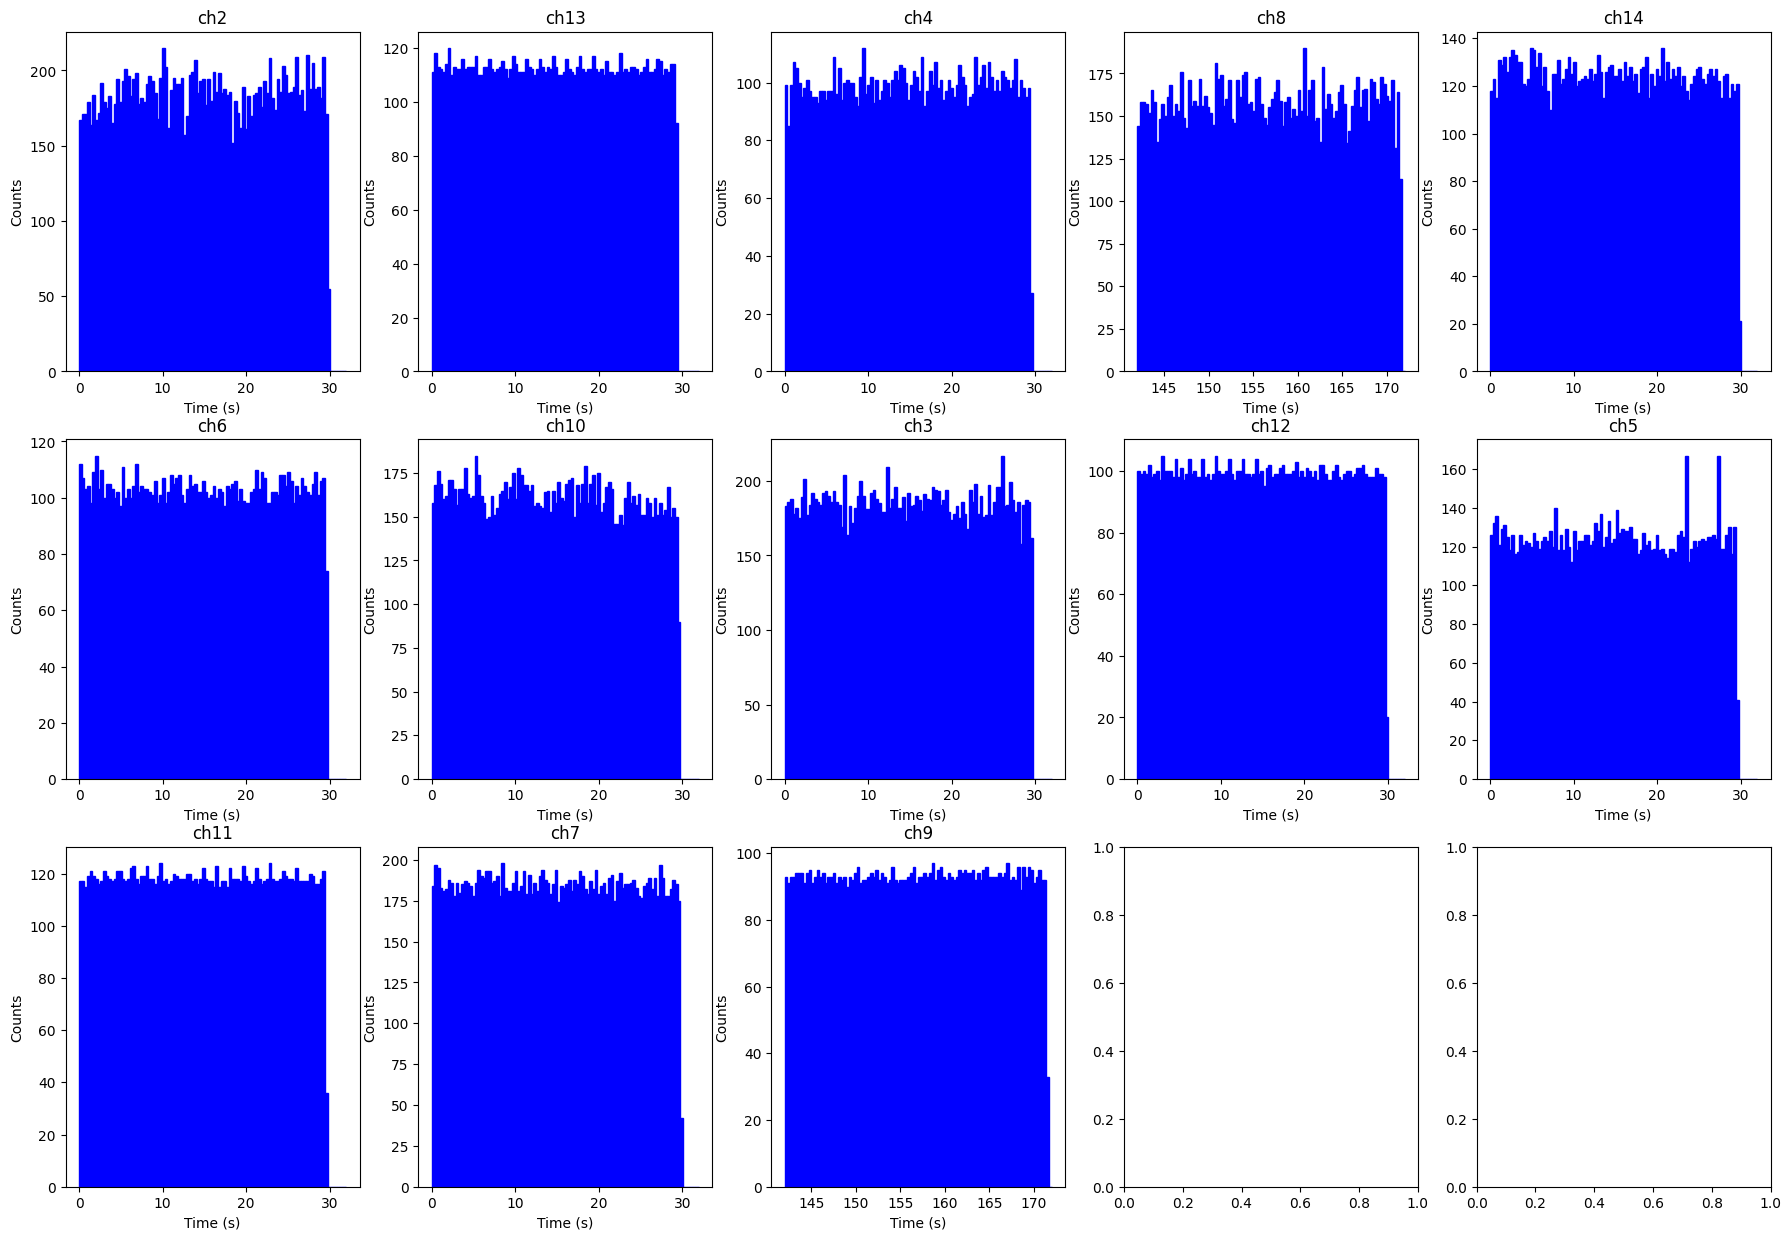

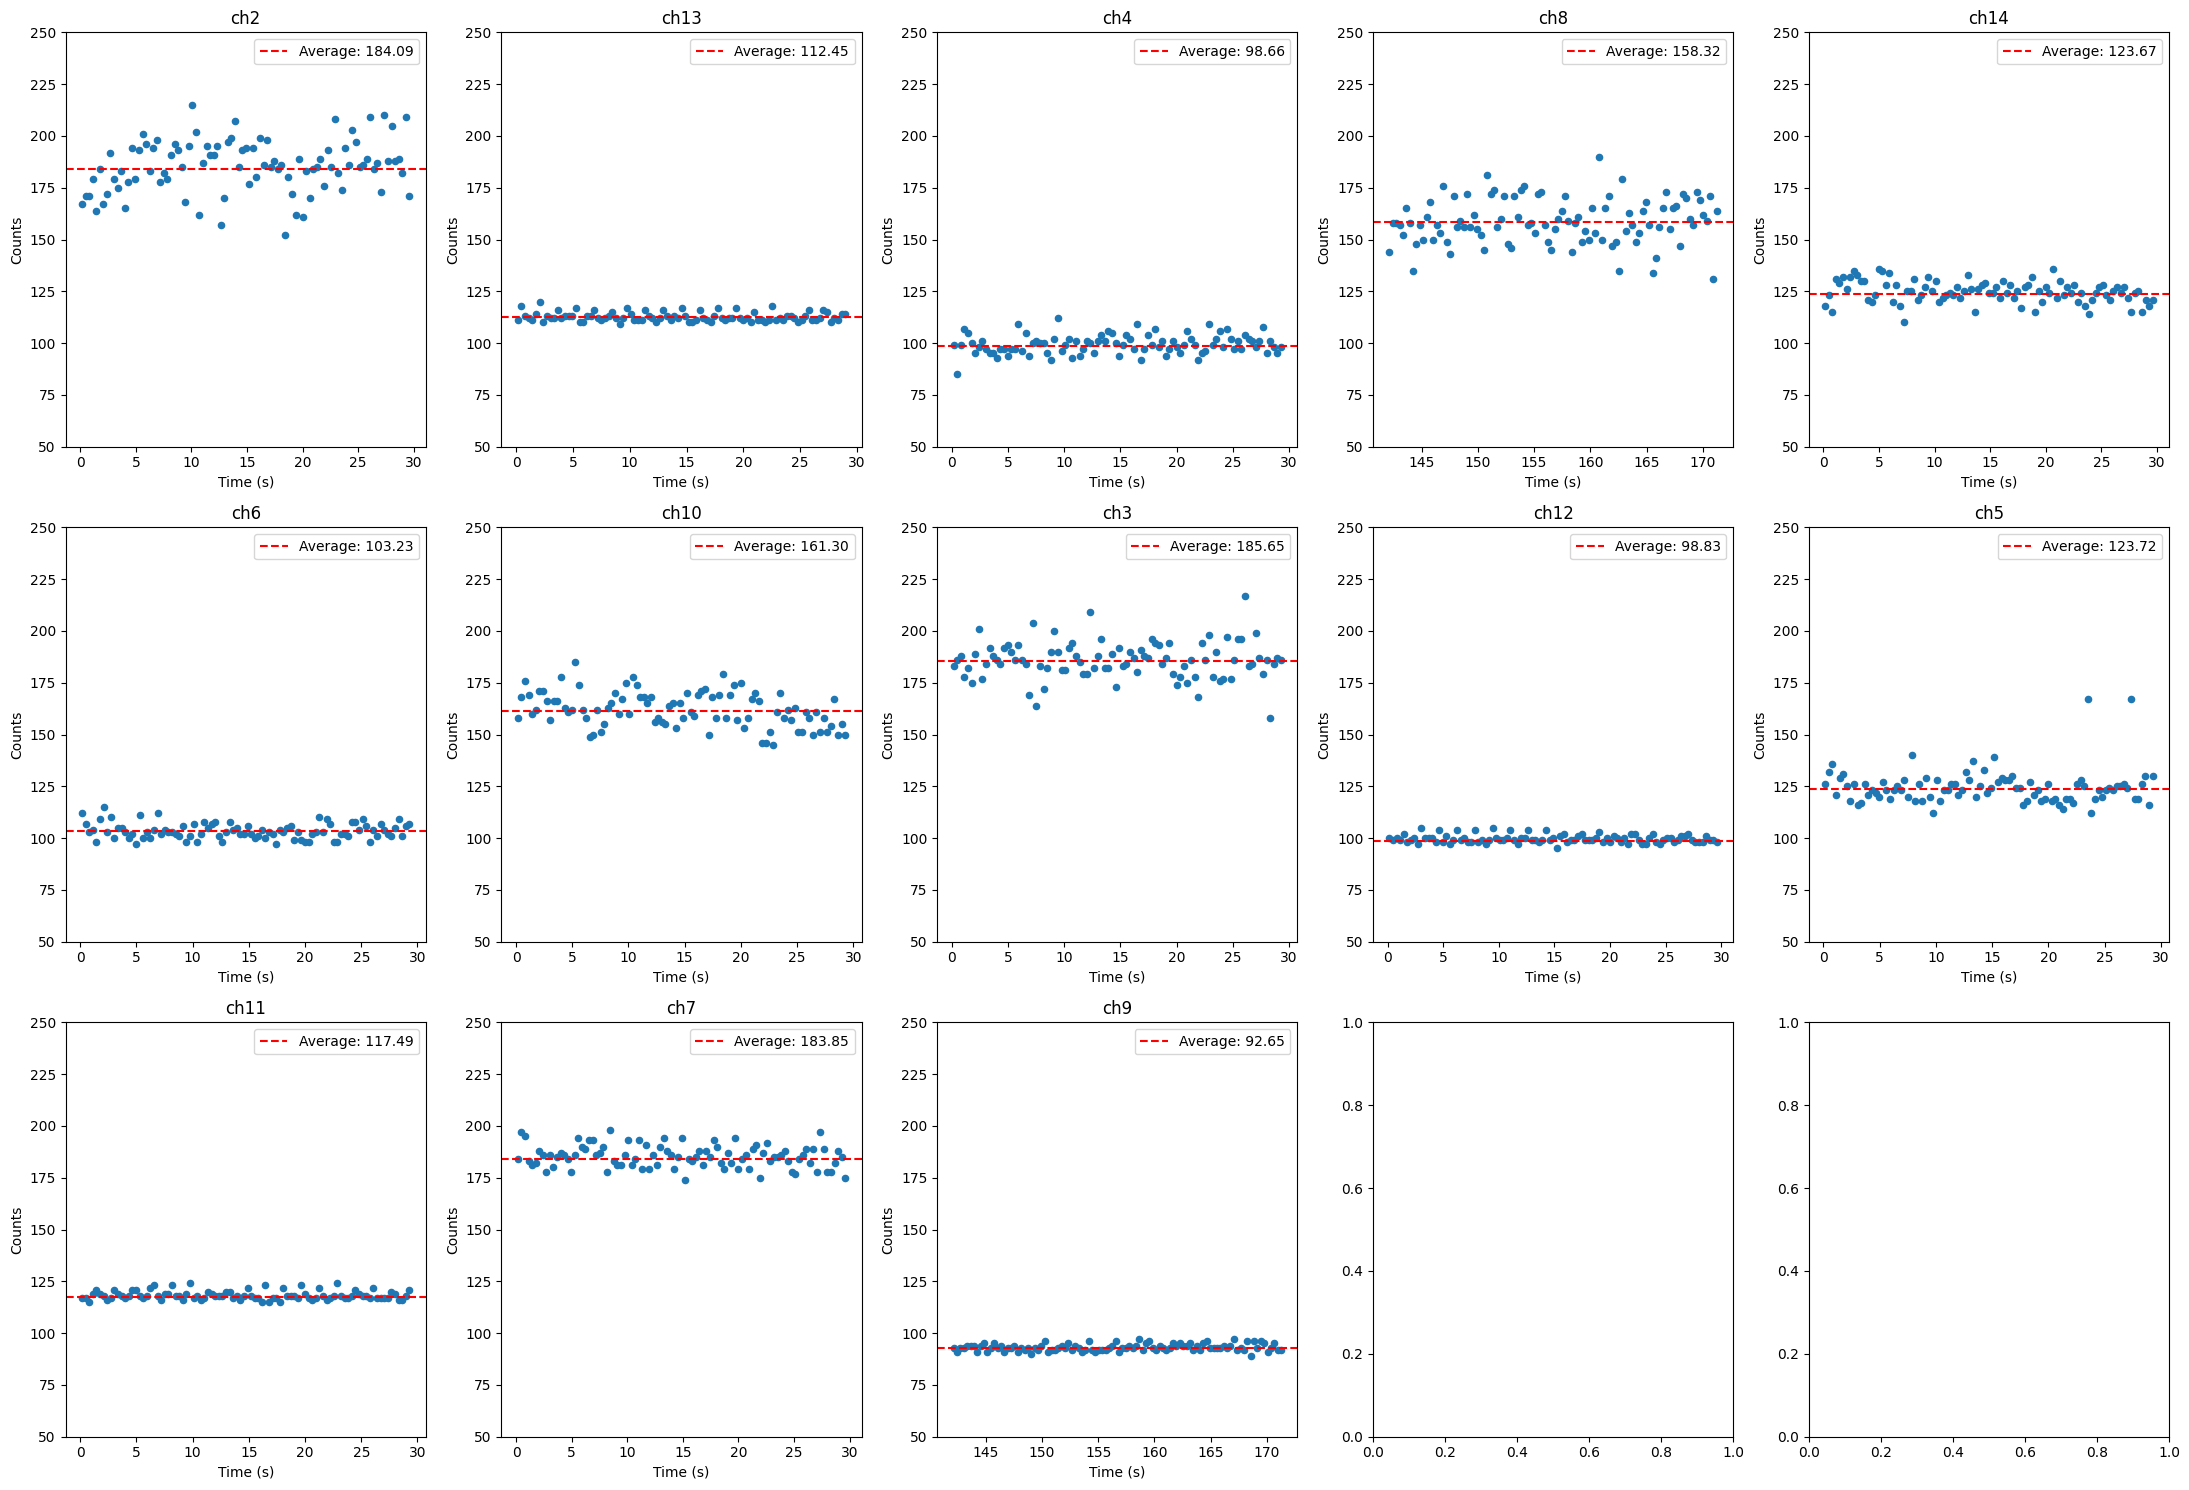

In [15]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 15))

# Create lists to store bin content from each histogram
bin_contents = []
bin_center=[]

# Create lists to store averages for each channel
averages = []

# Define the desired range for each histogram
histogram_ranges = [(0, 32), (0, 32),(0, 32), (142, 172),(0, 32), (0, 32),
                    (0, 32), (0, 32), (0, 32),(0, 32), (0, 32), (0, 32), (142, 172)]

# Loop through your data and create histograms
for i in range(13):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(timestamps_list[i], range=histogram_ranges[i], bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Counts')
    #ax.set_title(f'Ch {i + 2}')

  # Store the bin content in the bin_contents list
    bin_contents.append(hist)
    bin_center.append(bins)

axes[0, 0].set_title('ch2')
axes[0, 1].set_title('ch13')
axes[0, 2].set_title('ch4')
axes[0, 3].set_title('ch8')
axes[0, 4].set_title('ch14')
axes[1, 0].set_title('ch6')
axes[1, 1].set_title('ch10')
axes[1, 2].set_title('ch3')
axes[1, 3].set_title('ch12')
axes[1, 4].set_title('ch5')
axes[2, 0].set_title('ch11')
axes[2, 1].set_title('ch7')
axes[2, 2].set_title('ch9')


# Create a new 3x5 subplot grid to display the scatter plots of bin content
fig2, axes2 = plt.subplots(3, 5, figsize=(22, 15))

for i, content in enumerate(bin_contents):
    # Calculate the center of each bin
    bin_centers = (bin_center[i][:-1] + bin_center[i][1:]) / 2

    # Filter out bins with zero bin content
    non_zero_bins = content != 0
    avg = np.mean(content[non_zero_bins])
    averages.append(avg)

    # Scatter plot of non-zero bin content in the new subplot grid with specified range
    row = i // 5
    col = i % 5
    ax2 = axes2[row, col]
    ax2.scatter(bin_centers[non_zero_bins][:-1], content[non_zero_bins][:-1], marker='o', s=20)

    # Draw the average line on the scatter plot
    ax2.axhline(y=averages[i], color='red', linestyle='--', label=f'Average: {averages[i]:.2f}')

    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Counts')
    ax2.set_ylim(50, 250)
    #ax2.set_title(f'Ch {i + 2}')
    ax2.legend()

axes2[0, 0].set_title('ch2')
#axes2[0, 0].set_ylim(50, 250)
axes2[0, 1].set_title('ch13')
axes2[0, 2].set_title('ch4')
axes2[0, 3].set_title('ch8')
axes2[0, 4].set_title('ch14')
axes2[1, 0].set_title('ch6')
axes2[1, 1].set_title('ch10')
axes2[1, 2].set_title('ch3')
axes2[1, 3].set_title('ch12')
axes2[1, 4].set_title('ch5')
axes2[2, 0].set_title('ch11')
axes2[2, 1].set_title('ch7')
axes2[2, 2].set_title('ch9')

plt.tight_layout()
plt.show()

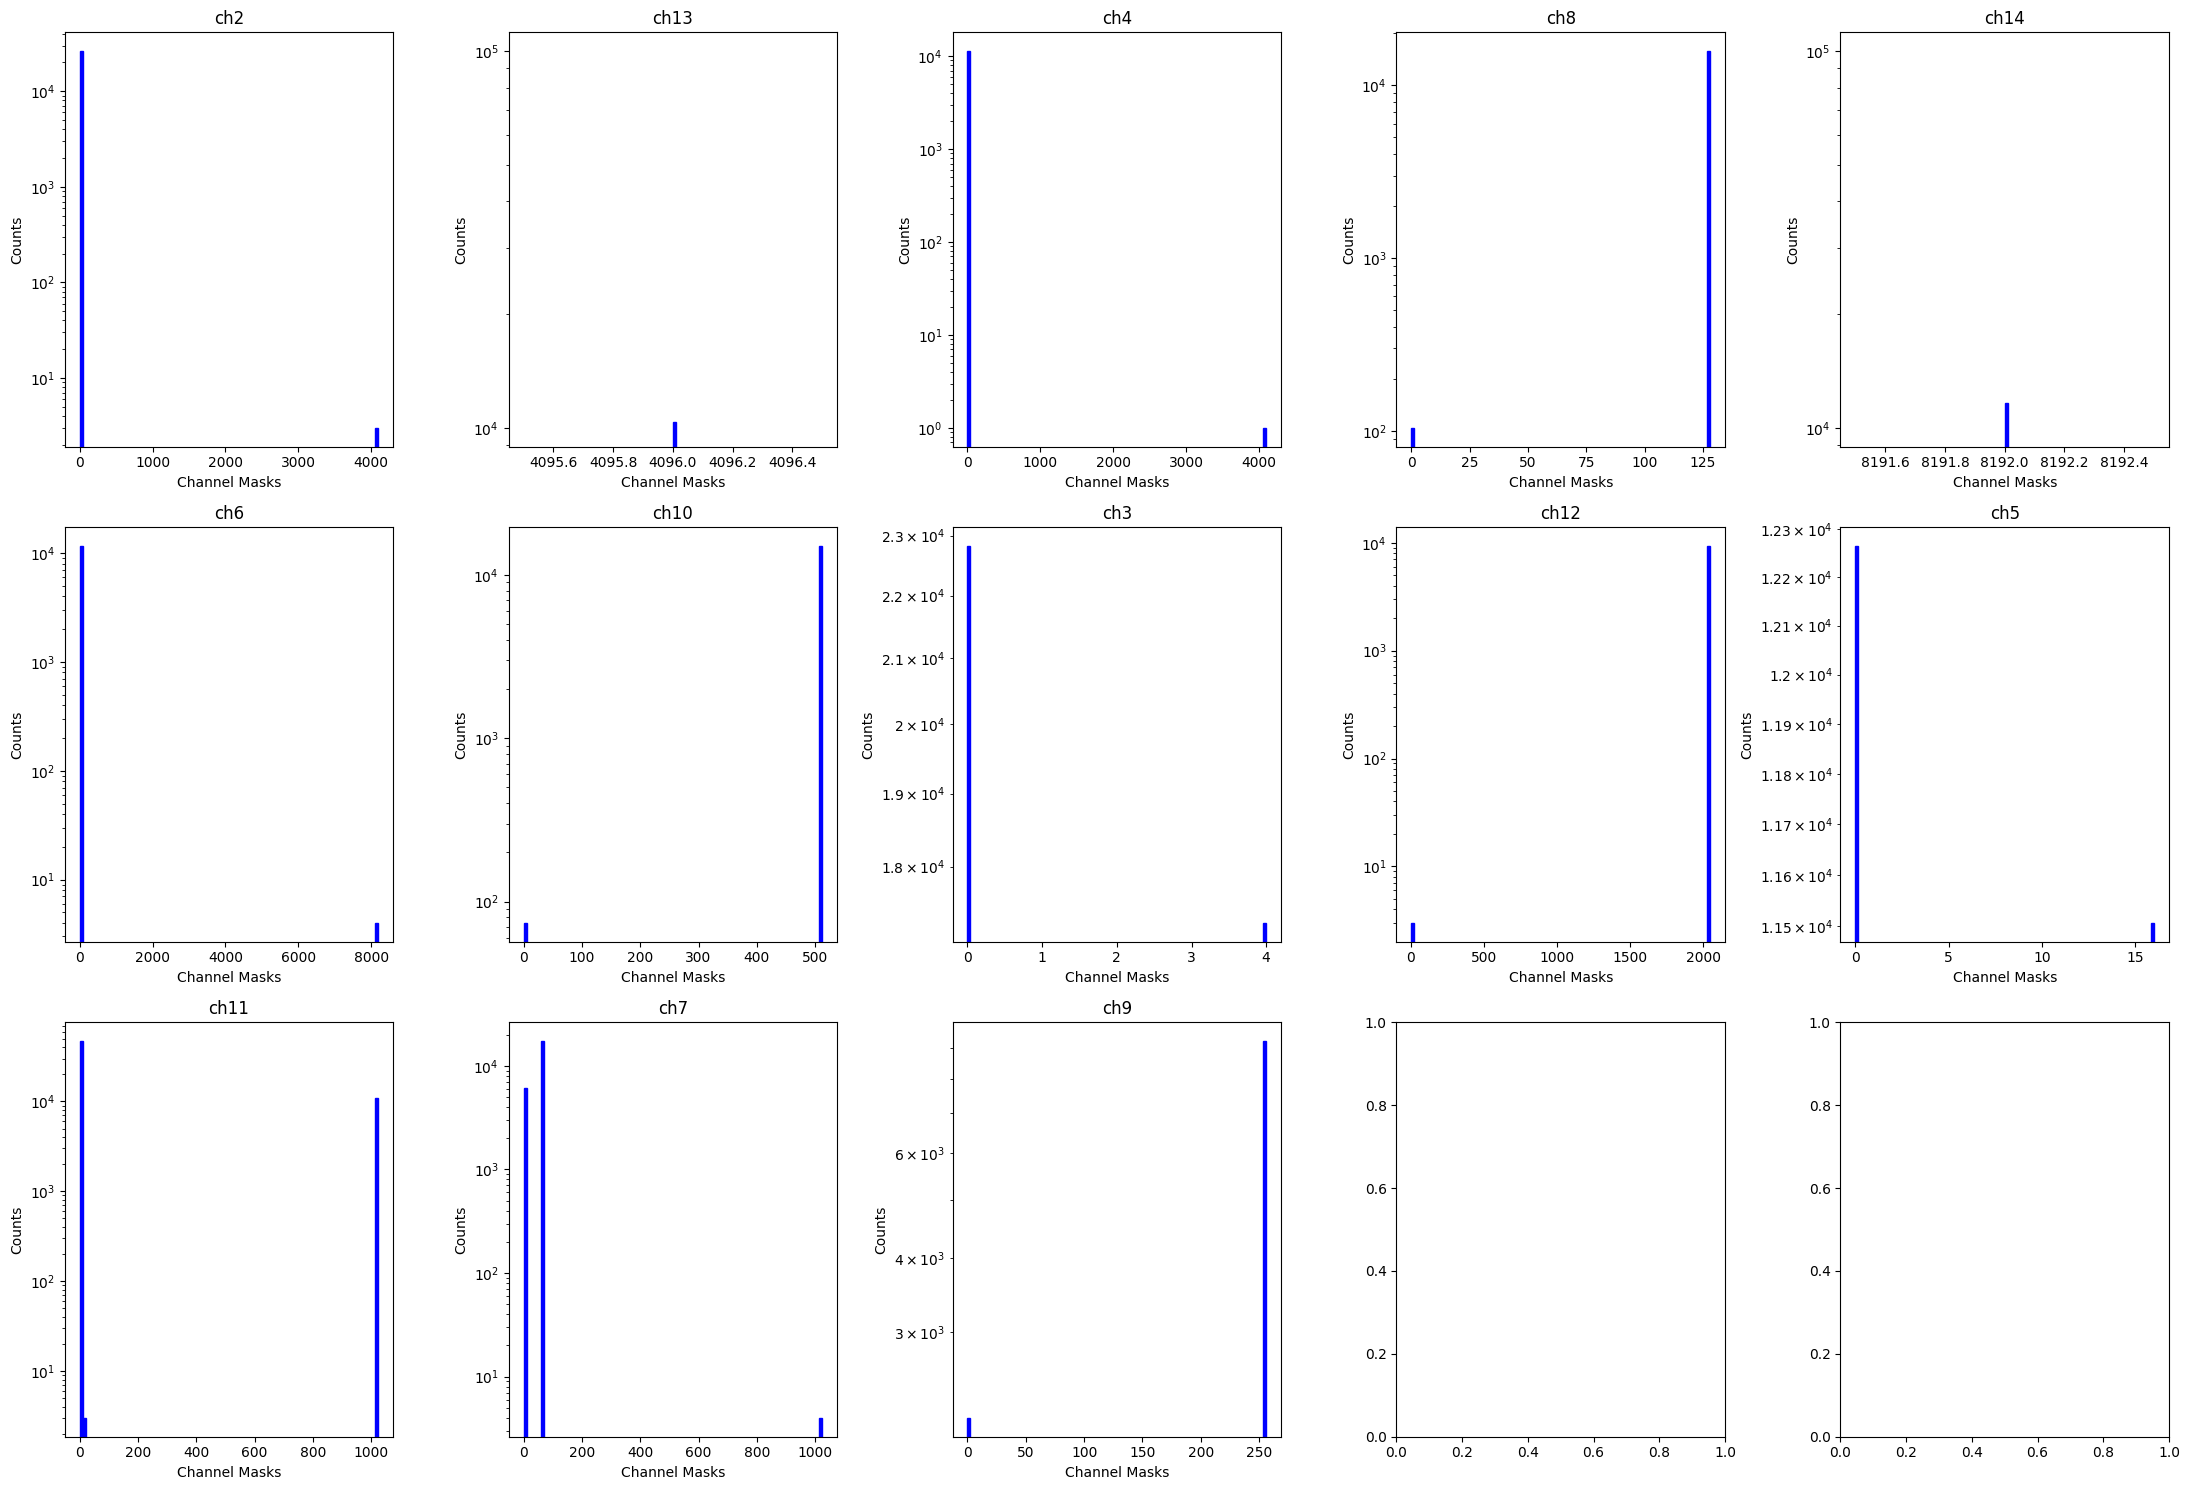

In [16]:
# Create a figure with a 3x5 grid of subplots
fig, axes = plt.subplots(3, 5, figsize=(22, 15))

# Loop through your data and create histograms
for i in range(13):
    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # Create the histogram and plot for the "timestamp" data
    hist, bins, _ = ax.hist(masks_list[i], bins=100, color='blue', alpha=1, edgecolor='blue')
    ax.set_xlabel('Channel Masks')
    ax.set_ylabel('Counts')
    ax.set_yscale('log')

axes[0, 0].set_title('ch2')
axes[0, 1].set_title('ch13')
axes[0, 2].set_title('ch4')
axes[0, 3].set_title('ch8')
axes[0, 4].set_title('ch14')
axes[1, 0].set_title('ch6')
axes[1, 1].set_title('ch10')
axes[1, 2].set_title('ch3')
axes[1, 3].set_title('ch12')
axes[1, 4].set_title('ch5')
axes[2, 0].set_title('ch11')
axes[2, 1].set_title('ch7')
axes[2, 2].set_title('ch9')

plt.tight_layout()
plt.show()